In [42]:
# AIM: To do a comparative analysis of the time-series data of stock prices of FANG companies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
from time import time
from datetime import timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
register_matplotlib_converters()

# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [83]:
# READING DATASET for FANG companies

df_am = pd.read_csv('Amazon.csv')

df_apl = pd.read_csv('Apple.csv')

df_fb = pd.read_csv('Facebook.csv')

df_nt = pd.read_csv('Netflix.csv')

df_gg = pd.read_csv('Google.csv')

In [84]:
df_am.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
1,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
3,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
4,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400


In [85]:
def conv_date(df):
    df['Date'] = pd.to_datetime(df.Date)
    #set date as index
    df.set_index('Date', inplace=True)

In [86]:
df_all = [df_am,df_fb,df_gg,df_nt, df_apl]
for d in df_all:
    conv_date(d)

In [87]:
# FUNCTIONS TO PLOT COLUMNS AND REMOVE MISSING VALUES
def plot_col(stks, lbls, y_val='Column val'):
    plt.figure(figsize=(10,4))
    for i,s in enumerate(stks):
        plt.plot(s, label=lbls[i])
        plt.title(y_val)
        plt.ylabel(y_val)
        plt.xlabel('Year')
        
        for year in range(2015,2023):
            plt.axvline(str(year)+'-01-02', color = 'gray', linestyle='--')
        
        # Marking the covid area
       
        plt.fill_between([str(2020)+'-01-02',str(2021)+'-01-02'],s.min(),s.max(),alpha = 0.1)
            
    #plt.savefig(lbl+'.png', dpi = 600, format = 'png', facecolor = 'white', bbox_inches='tight')
    plt.legend()
    plt.savefig(y_val+'.png', dpi = 600, format = 'png', facecolor = 'white', bbox_inches='tight')
    plt.show()

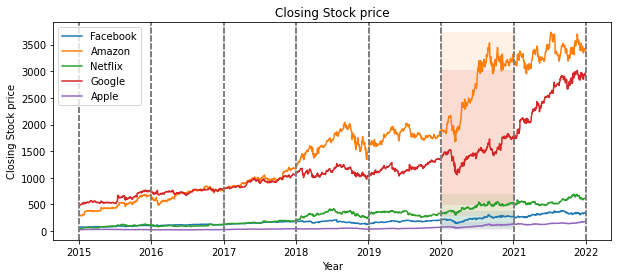

In [89]:
# CHECKING EACH COLUMN VALUES

stks_all = [df_fb.Close, df_am.Close, df_nt.Close, df_gg.Close, df_apl.Close]
labels_all = ['Facebook', 'Amazon', 'Netflix','Google', 'Apple']

plot_col(stks_all,y_val='Closing Stock price', lbls = labels_all)

# Mark Covid phase for Amazon

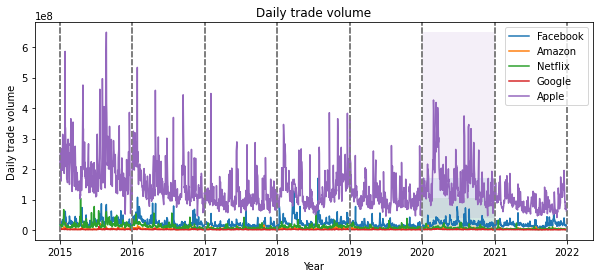

In [90]:
# CHECKING Volume of shares - quantity of shares of securities traded

volume_all = [df_fb.Volume, df_am.Volume, df_nt.Volume, df_gg.Volume, df_apl.Volume]
labels_all = ['Facebook', 'Amazon', 'Netflix','Google', 'Apple']

plot_col(volume_all,y_val='Daily trade volume', lbls = labels_all)

In [91]:
# Finding the daily percentage return

def daily_return(df):
    df['return_val'] = ((df['Close'] - df['Open'])/df['Close'])*100


In [95]:
df_all = [df_fb,df_am,df_nt,df_gg, df_apl]
for d in df_all:
    daily_return(d)

In [96]:
def wkly_avg(df):
    return df.resample(rule='1W').mean()


df_fb_wk = wkly_avg(df_fb)
df_am_wk = wkly_avg(df_am)
df_nt_wk = wkly_avg(df_nt)
df_gg_wk = wkly_avg(df_gg)
df_apl_wk = wkly_avg(df_apl)

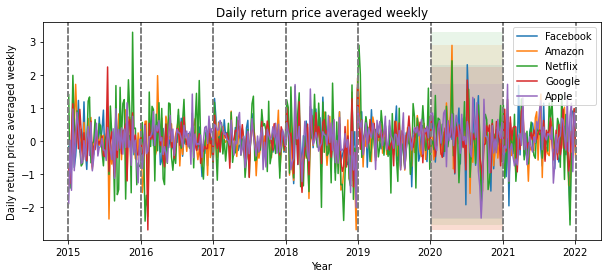

In [97]:
# CHECKING EACH COLUMN VALUES

return_all = [df_fb_wk.return_val,df_am_wk.return_val,df_nt_wk.return_val,df_gg_wk.return_val,df_apl_wk.return_val]

labels_all = ['Facebook', 'Amazon', 'Netflix','Google', 'Apple']

plot_col(return_all,y_val='Daily return price averaged weekly', lbls = labels_all)

# Mark Covid phase for Amazon

In [63]:
# Netflix has the most variation of all these in the daily return price.

In [98]:
# Next, I see if the stock price of these companies are correlated or not

closing_price = pd.DataFrame()
closing_price['fb'] = df_fb['Close']
closing_price['am'] = df_am['Close']
closing_price['nt'] = df_nt['Close']
closing_price['gg'] = df_gg['Close']
closing_price['apl'] = df_apl['Close']

In [99]:
closing_price.head()

,fb,am,nt,gg,apl
Date,,,,,
2015-01-02,78.449997,308.519989,49.848572,523.373108,27.332500
2015-01-05,77.190002,302.190002,47.311428,512.463013,26.562500
2015-01-06,76.150002,295.290009,46.501431,500.585632,26.565001
2015-01-07,76.150002,298.420013,46.742859,499.727997,26.937500
2015-01-08,78.180000,300.459991,47.779999,501.303680,27.972500


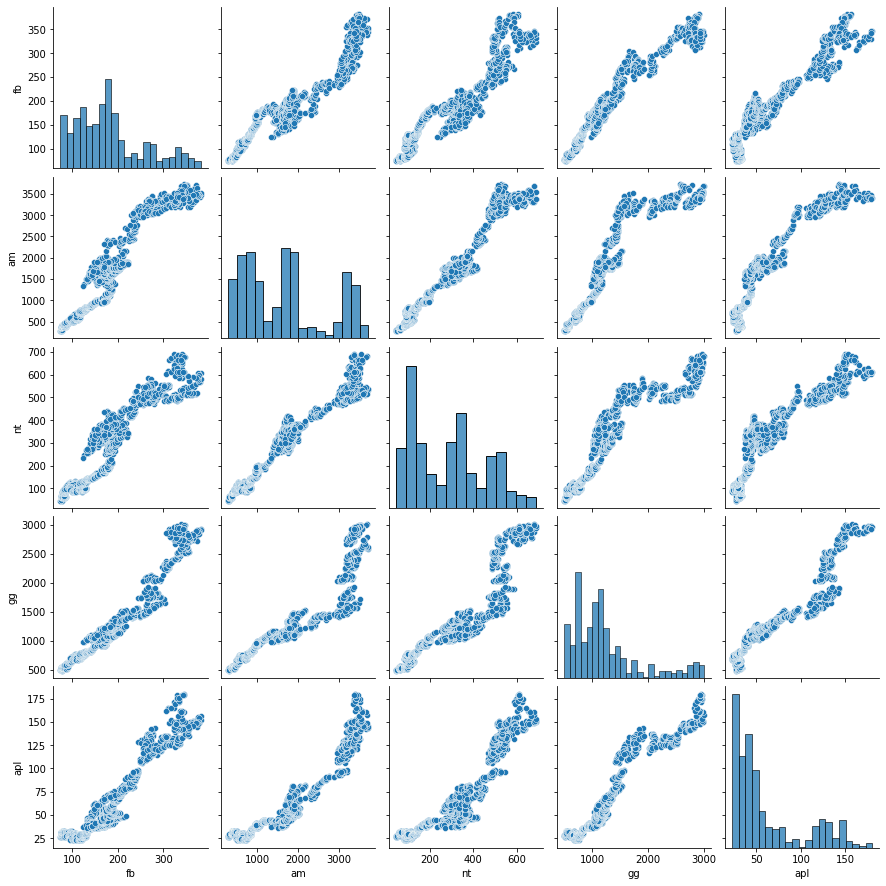

In [100]:
import seaborn as sns
sns.pairplot(closing_price)
sns.despine()
plt.savefig('stocks-pairplot.png', dpi = 300, format = 'png', facecolor = 'white', bbox_inches='tight')

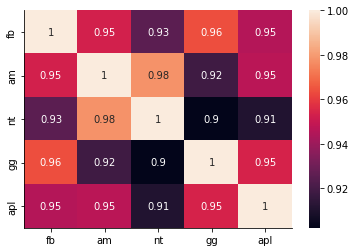

In [101]:
sns.heatmap(closing_price.corr(),annot=True)
sns.despine()
plt.savefig('stocks-heatmap.png', dpi = 300, format = 'png', facecolor = 'white', bbox_inches='tight')

In [19]:
# There is maximum correlation between stock price of Amazon and Netflix, and Google and Facebook

In [102]:
# Analysing now the daily return of each stock for these companies

daily_return = pd.DataFrame()
daily_return['fb'] = df_fb['return_val']
daily_return['am'] = df_am['return_val']
daily_return['nt'] = df_nt['return_val']
daily_return['gg'] = df_gg['return_val']
daily_return['apl'] = df_apl['return_val']

In [103]:
daily_return.head()

,fb,am,nt,gg,apl
Date,,,,,
2015-01-02,-0.165717,-1.315959,1.398524,-0.800285,-1.884204
2015-01-05,-1.023450,-1.595026,-4.115589,-1.827316,-1.920000
2015-01-06,-1.418255,-2.353612,-1.818675,-2.597824,-0.263501
2015-01-07,-0.801051,0.308295,-1.292779,-1.177411,0.510445
2015-01-08,1.841906,0.046590,1.381331,0.932998,2.377331


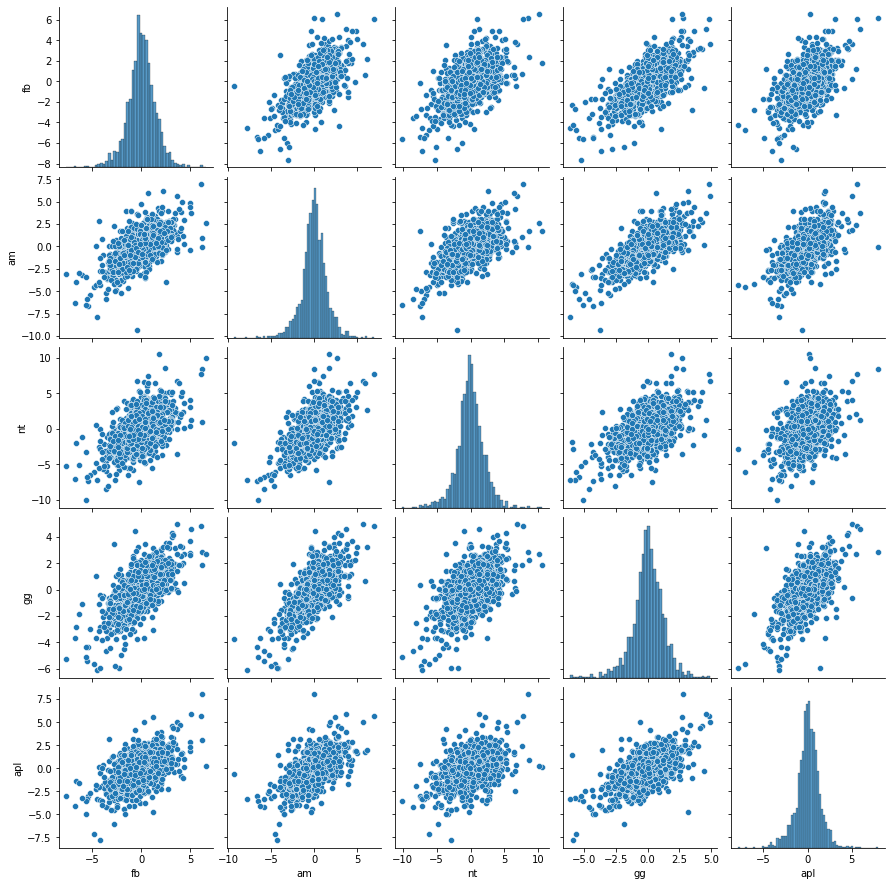

In [104]:
sns.pairplot(daily_return)
sns.despine()
plt.savefig('daily-return-pairplot.png', dpi = 300, format = 'png', facecolor = 'white', bbox_inches='tight')

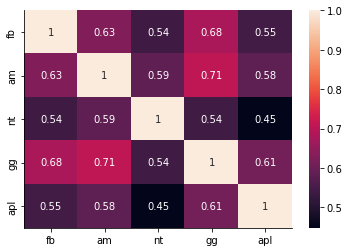

In [105]:
sns.heatmap(daily_return.corr(),annot=True)
sns.despine()
plt.savefig('daily-return-heatmap.png', dpi = 300, format = 'png', facecolor = 'white', bbox_inches='tight')

In [73]:
# Max correlation on daily return is between Amazon and Google, 
# there is also some between google and facebook

In [74]:
# I can now also do some risk analysis based on the standard deviation of these daily returns


In [106]:
# STOCK PRICE GROWTH in the last 4 years:

# Reset index:

def reset_index_df(df):
    df.reset_index(inplace=True)


In [107]:
for d in df_all:
    reset_index_df(d)

In [113]:
# Minimum and maximum of each stock:

df_all = [df_fb,df_am,df_nt,df_gg, df_apl]

min_st = [df[df['Date'] == df[df['Date'] > '2017-12-31']['Date'].min()]['Close'].values.item()
          for df in df_all]
max_st = [df[df['Date'] == df[df['Date'] > '2017-12-31']['Date'].max()]['Close'].values.item()
          for df in df_all]
print('Minimum and Maximum stocks over last 4 years for each company: ')
print(min_st)
print(max_st)

dif_stk = np.array(max_st) - np.array(min_st)

# % of growth = ((Final - Initial)/ Initial) * 100

growth = ((dif_stk/min_st)*100). tolist()

print(growth)

Minimum and Maximum stocks over last 4 years for each company: 
[181.419998, 1189.01001, 201.070007, 1065.0, 43.064999]
[342.940002, 3384.0200200000004, 610.539978, 2930.090088, 179.380005]
[89.03098102779165, 184.60820275180026, 203.64547508072647, 175.12582985915492, 316.5331688501839]


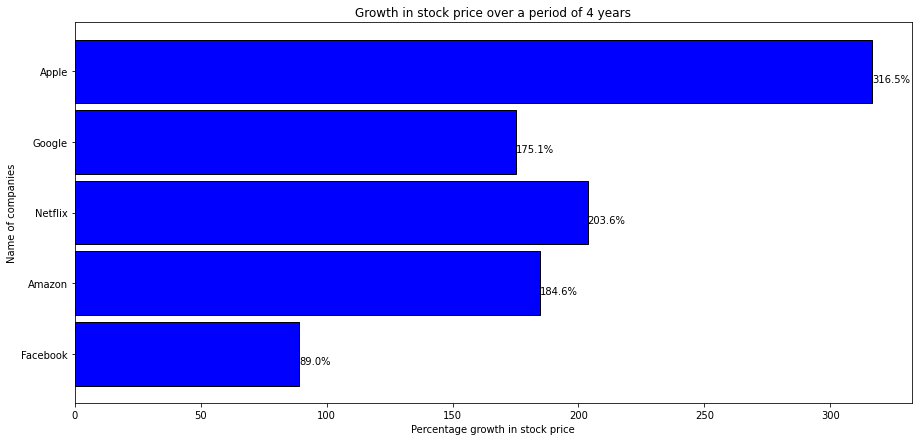

In [115]:
# Visualising the growth:
name_list = labels_all
fig, ax = plt.subplots(figsize=(15,7))
ax.barh(y=name_list, width=growth, height=0.9, color=['blue'],
       edgecolor='black')
for p in ax.patches:
    ax.annotate(f'{round(p.get_width(),1)}%', (p.get_width(), p.get_y() +0.3))
ax.set_xlabel('Percentage growth in stock price')
ax.set_ylabel('Name of companies')
ax.set_title("Growth in stock price over a period of 4 years")
plt.savefig('growth-percent-allcomps.png', dpi = 300, format = 'png', facecolor = 'white', bbox_inches='tight')
plt.show()

In [110]:
# Maximum Growth is of Apple and second place is held by Netflix.

In [111]:
# Daily return of any stock price is 0%
# Creating a histogram of daily return of stock prices :

def plot_hist_return(df, lbl):
    plt.figure(figsize=(13,6), facecolor='gainsboro')
    plt.hist(df['return_val'], density=True)
    plt.axvline(x=df['return_val'].mean(), color='yellow', ls='--')
    plt.xlabel('Histogram')
    plt.title('Histogram of daily return value of %s'%lbl)
    plt.annotate(f"Mean daily return={round(df['return_val'].mean(),2)}%", xy = (df['return_val'].mean(), 0.10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'))
    
    
    plt.savefig('Histogram-return-'+lbl+'.png', dpi = 300, format = 'png', facecolor = 'white', bbox_inches='tight')
    plt.show()

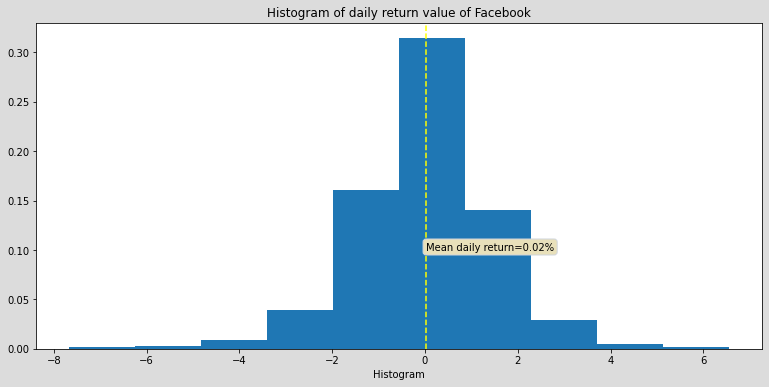

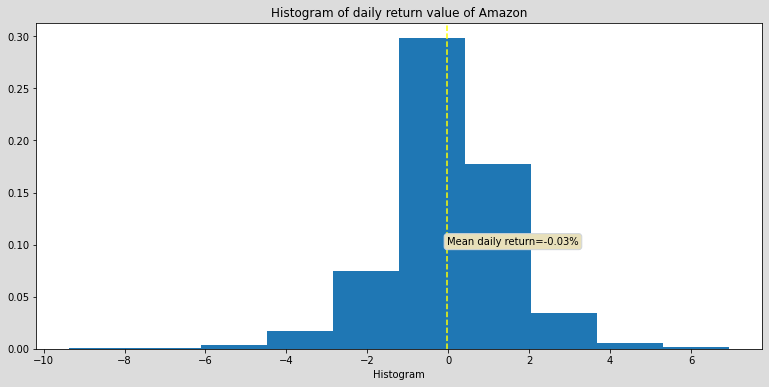

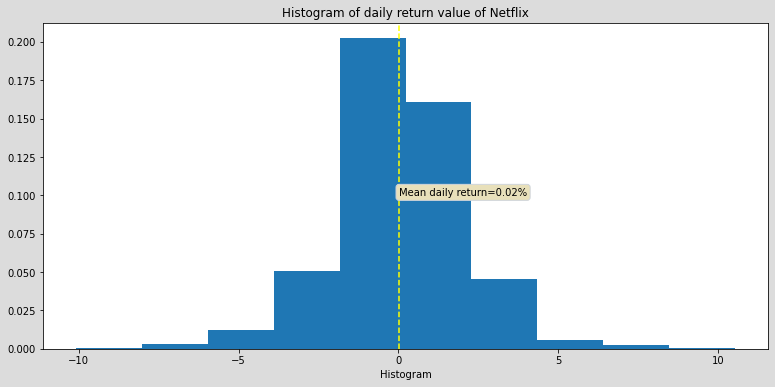

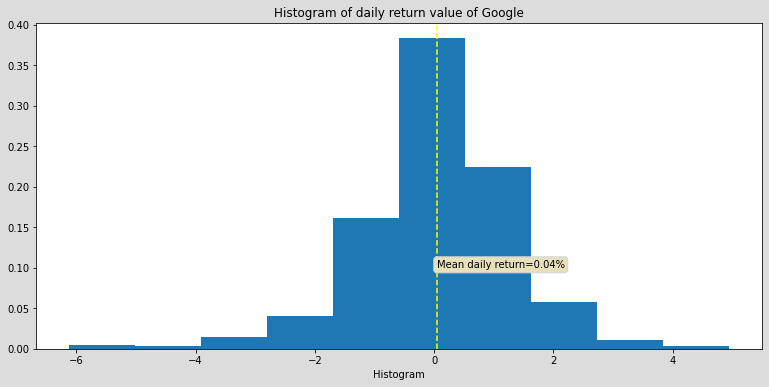

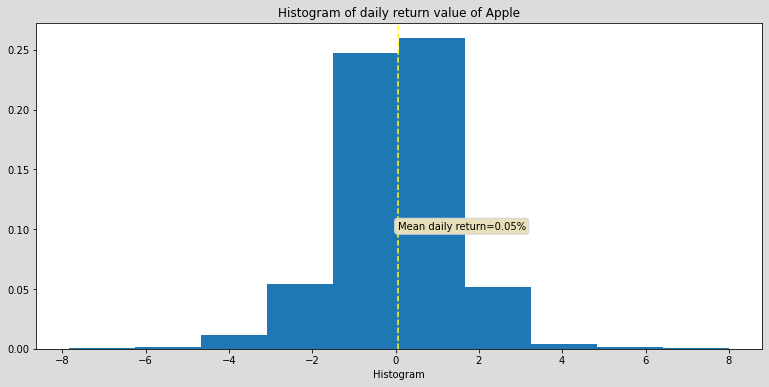

In [112]:

for i,d in enumerate(df_all):
    plot_hist_return(d, labels_all[i])

In [82]:
# Confirmed that daily return value of each stock is indeed zero.